In [111]:
b.matlab_eng.slm_close(nargout=0)
b.matlab_eng.camera_close(nargout=0)
b.matlab_eng.quit()

In [57]:
# sio.savemat('data/self.concat_res=5/data.mat',dict([('ks_data_origin',ks_data_origin),
#                 ('b.output_w',b.output_w),('rmse',rmse),('rmse_vec',rmse_vec),
#                 ('rmse_vert',rmse_vert),('pred_output',pred_output),('xx_',xx_),
#                 ('tt',tt)]))

In [1]:
#!/usr/bin/python

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import scipy.io as sio

# import os
# import sys
import numpy as np
import time

from reservoir import Reservoir
import data1D
import data_utils

%load_ext autoreload
%autoreload 2
%aimport data1D
%aimport reservoir

%matplotlib inline
import matplotlib.pyplot as plt

import matlab.engine

In [64]:
# Input data
n_res=5000
n_sequence=1
spatial_points = 30
spatial_points_ = spatial_points
lyap_exp = 0.0461
n_train = 3000
n_test = 2000
forget = 400
parallel_runs = 1
ks_data_origin, xx, tt = data1D.kuramoto_sivashinsky_from_dataset(
    sequence_length=n_train+n_test, n_sequence=n_sequence, spatial_points=spatial_points)

In [2]:
# Matlab engine initialization
matlab_eng = matlab.engine.start_matlab()
matlab_eng.cd(r'D:\projects\reservoir-computing-python\hardware_control', nargout=0)

# Camera initialization
cam_roi = [200, 200]
cam_sampling_range = np.linspace(0, (cam_roi[0]-1)*(cam_roi[1]-1)-1, n_res, dtype='uint32')
if n_res > (cam_roi[0]-1)*(cam_roi[1]-1)-1:
    warnings.warn("The number of camera pixels is less than the required size of the reservoir")
matlab_eng.workspace['cam_roi'] = matlab.double(cam_roi)
matlab_eng.camera_open(nargout=0)

# SLM initialization
slm_size = [1920, 1152]
matlab_eng.workspace['slm_size'] = matlab.double(slm_size)
matlab_eng.slm_open(nargout=0)

In [122]:
b = Reservoir(n_res=n_res, res_scale=1, res_encoding='meadowlark slm', res_enc_param=128,
              remove_saturated_neurons=True, n_saturated_neurons=30, # reservoir cleanup 
              input_scale=1, input_encoding='meadowlark slm', input_enc_param=128,
              random_projection='meadowlark slm',
              scale_input_MinMax = (0, 1), scale_output_MinMax = (0, 1), scale_res_MinMax = (0, 1), # data standardization
              raw_input_feature = True, enc_input_feature = False, # concatenated states properties
              activation_fun='intensity_in_tanh', activation_param = 255, activation_param1 = 100, activation_param2 = 3.8,
              parallel_runs=parallel_runs,  bias_scale=np.sqrt(2), leak_rate=0.3,
              pred_horizon=1, rec_pred_steps=200, forget = forget,
              train_method='ridge', train_param=0.4, verbose=1,
              cam_roi=cam_roi, cam_sampling_range=cam_sampling_range, 
              slm_size=slm_size, matlab_eng=matlab_eng, # SLM experiment
              random_state = 100
             )

# Algorithm training
ks_data_train = ks_data_origin[:, :n_train, :]
input_shape = ks_data_train.shape
b.fit(ks_data_train);

Reservoir Computing algorithm - Training phase:

Initialization complete. 		Elapsed time: 0.0029871463775634766 s
1.0 0.0 128


1.2715879346979282 -0.14199107639560926 128
1.5219598237018486 -0.04021439386736372 128
1.746602773856475 -0.007982799346634335 128
1.8586733045857886 -0.0005515948358055145 128
1.9223318010262913 0.001294859298076387 128
1.942169334719284 0.0016813443979891908 128
1.9527430627334526 0.001477119441951107 128
1.9512927132314326 0.0013378504451137675 128
1.9629805942585667 0.0012960697460625656 128
1.9509027359985027 0.0012878638873162047 128
1.9490502214843093 0.0012810737787232968 128
1.9515139582946945 0.0012790367461454244 128
1.9531712974268642 0.0012784256363720628 128
1.9471527688433183 0.0012782423034400543 128
1.9403224854073353 0.0012782375681007143 128
1.9422504125751132 0.0012781858829586496 128
1.926820929805925 0.0012781703774160302 128
1.9155403074302204 0.0012781657257532446 128
1.9287087267434448 0.001278333704798925 128
1.94085945724748 0.0012782147239681128 128
1.9317405629522522 0.0012781790297188692 128
1.9481451261735248 0.0012781683214440963 128
1.9506884910377003 

1.8904320639158296 0.0012390504748885465 128
1.9171639417919746 0.0013113627700911152 128
1.9333601743474977 0.0013057061163329695 128
1.936184707058589 0.0012864264474283264 128
1.9169437730193555 0.0013255755618530492 128
1.9262048183342206 0.0012977987497449473 128
1.9380151124531788 0.0012990101954563455 128
1.9375811884902934 0.001284417671165339 128
1.9330754161389256 0.0012827378490162893 128
1.9553203267014623 0.0012795359672333221 128
1.963081733974684 0.001278575402698432 128
1.964249287505786 0.0012935509118799028 128
1.9673487818894104 0.0012827798860924062 128
1.9630363526207577 0.001340631738270984 128
1.9630185721500637 0.0012969041340097306 128
1.9685609852208614 0.0013287188678274705 128
1.956038089977655 0.0012934282028151077 128
1.9352440624666816 0.0013276760884690835 128
1.923908835853954 0.0013379504541652762 128
1.9351521408454477 0.0012973102960772758 128
1.9460154366650309 0.001328840716447734 128
1.9579122973633458 0.0013382998425588715 128
1.967989103875596 0

1.9845816343426375 0.0012170445097483987 128
1.9786097614246207 0.001259827965452955 128
1.9802398038732232 0.001272663002164322 128
1.9795767086184384 0.001276513513177732 128
1.9679806789493681 0.001277668666481755 128
1.950547870637723 0.001278015212472962 128
1.911656662558597 0.001278119176270324 128
1.896498397697711 0.0012781503654095325 128
1.8844960265323698 0.0012781597221512952 128
1.9080805065325706 0.0012921143948102342 128
1.916908283453767 0.0012425708764714392 128
1.919556616530126 0.0012247002040935008 128
1.9253497107370459 0.0012193390023801194 128
1.8931724198623483 0.001217730641866105 128
1.9219983604730833 0.0012172481337119007 128
1.9494312261958595 0.0012171033812656393 128
1.974514291795371 0.0011763191287089893 128
1.9820392114752243 0.001204824679764766 128
1.9842966873791803 0.0012561620164578651 128
1.984973930150367 0.0013164962325619108 128
1.9846627365870675 0.0013345964973931245 128
1.9850837449127332 0.0013400265768424885 128
1.985210047410433 0.00129

1.941975286927541 0.001276513778515945 128
1.949675788667855 0.0012348830747068527 128
1.9503725310117532 0.0012651795349404912 128
1.9615973952677714 0.0012314828016342164 128
1.9625868849441679 0.0012641594530187004 128
1.9641008327966312 0.0012311767770576791 128
1.9678788545444208 0.0012799466021933552 128
1.9765551736594418 0.001278698593186442 128
1.9826514760344458 0.001278324190484368 128
1.9844803667469468 0.001298713507652681 128
1.9808488774805553 0.0013292616799203555 128
1.9828854150954829 0.0013384261316006579 128
1.9840361820706023 0.001343732669964251 128
1.983841606472497 0.0013427674286138266 128
1.981998521395943 0.0012975448411125835 128
1.9826638265464815 0.0012839780648622105 128
1.9844840719005576 0.0012799080319870985 128
1.9850301455067805 0.0013236200372206807 128
1.9851939675886472 0.0013367336387907554 128
1.9852431142132074 0.001295734704165662 128
1.9842036861152785 0.001283435023778134 128
1.9814526231306993 0.0012797451196618756 128
1.983457681649729 0.0

1.9556913193993908 0.0012781638386723708 128
1.962032163133198 0.0012781637641301467 128
1.970140371494829 0.0012781637417674794 128
1.9686348917375858 0.0012781637350586792 128
1.971205882187868 0.001235378061669673 128
1.9753900694892077 0.0012653280310293373 128
1.9766453256796097 0.0013192460369333525 128
1.9770219025367304 0.001290488423608441 128
1.9827914946976324 0.0012818611396109678 128
1.978865753242137 0.0012792729544117258 128
1.9776880308054885 0.001278496498851953 128
1.9813706793693453 0.0012782635621840213 128
1.9840961277474167 0.0012781936811836418 128
1.9849137622608382 0.001278172716883528 128
1.9851590526148646 0.0012353807562171274 128
1.98301753348077 0.0012653288393935738 128
1.9845901839808442 0.0012743132643465076 128
1.9850619791308663 0.0012342229204560214 128
1.985203517675873 0.0012649814886652418 128
1.985245979239375 0.001274209059128008 128
1.9852587177084255 0.0012961974550703586 128
1.9852625392491408 0.0012974362156403757 128
1.9779821237532391 0.00

1.9099819359801433 0.0012698782748434968 128
1.9060247513247885 0.0012953452223651435 128
1.8833778644927053 0.0012833181792379785 128
1.8724337105810598 0.001279710066299829 128
1.9237386708952506 0.0012786276324183842 128
1.913209962170354 0.0012785075559444215 128
1.896964387581238 0.0012354812079353955 128
1.899233662729269 0.0012653589749090542 128
1.921586862366786 0.0012315366336247853 128
1.8880464978053046 0.0012213899312395046 128
1.8798412703298957 0.0012611315919002868 128
1.888344697561321 0.0012730540900985216 128
1.9055166968587358 0.0013215638546541077 128
1.8832254481528894 0.0013361167840207834 128
1.8948009643297348 0.001303609855596684 128
1.90745357688926 0.0012857975692074407 128
1.9284127278211176 0.0013253868983867834 128
1.934700473100675 0.0013372636971405861 128
1.9322269054782075 0.001340826736766727 128
1.9291507974214706 0.0013418956486545694 128
1.9425246399111995 0.0012972833071248063 128
1.9188457528751388 0.0012838996046658773 128
1.9358073928154542 0.

1.9247982143241738 0.0012783439694736424 128
1.9375931312501646 0.0012782178033705282 128
1.941431606327962 0.0012781799535395938 128
1.946208882583147 0.0012781685985903135 128
1.9476420654597024 0.0012781651921055293 128
1.9451845857018841 0.0012781641701600942 128
1.9521783329984141 0.0012366240529526858 128
1.9301376313935201 0.0012229161570378748 128
1.9369193215777178 0.0012615894596397978 128
1.922885980910146 0.001241304124187006 128
1.940291712584071 0.0012999118949536747 128
1.957412281088602 0.0012846881810145378 128
1.9625484516399614 0.0013352533019569037 128
1.9602587321693112 0.0012952906031155065 128
1.9582619665282652 0.0012839651851732014 128
1.9529483843698763 0.0012799041680803958 128
1.937701278858968 0.001305327557911756 128
1.9078026850249703 0.0012863128799019622 128
1.9161493740740196 0.0012806084764990242 128
1.9166549966590365 0.0012788971554781427 128
1.9074807999044439 0.0012783837591718783 128
1.9199293658875054 0.0012782297402799988 128
1.9204629412602476

1.9625117255138473 0.0013419855941146093 128
1.9525329183389126 0.001342243305858934 128
1.9543828327895227 0.0012973876042861156 128
1.9659702634126992 0.0012839308938142702 128
1.970406493690402 0.0012798938806727164 128
1.9726526706619902 0.001235897105353884 128
1.9588790037881898 0.0012654837441346007 128
1.9478173680893696 0.0013116931645660078 128
1.9529681677146598 0.0012905024377879149 128
1.9559827126320655 0.00128186534386481 128
1.9488033715105524 0.0012792742156878785 128
1.9547332737708332 0.001278496877234799 128
1.9629056180954954 0.0012354780043225089 128
1.9641964527420295 0.001265358013825188 128
1.9563421384122015 0.0012743220166759918 128
1.9555255988115094 0.001277011217531233 128
1.9521274740548495 0.0012778179777878053 128
1.9642868469218864 0.0012780600058647771 128
1.9621177721305005 0.0012781326142878686 128
1.9692507463057425 0.001278154396814796 128
1.9509288908446354 0.0012781609315728742 128
1.9700629050206806 0.0013230959070964134 128
1.9696674762116357 

1.985264177052065 0.001338348617134779 128
1.9852641770522326 0.0013411522127649849 128
1.985264177052283 0.0013419932914540468 128
1.985264177052298 0.0013055795609355832 128
1.9852641770523025 0.0012863884808091103 128
1.9824252925698846 0.0013018314307131288 128
1.9833583396222818 0.001293427281731683 128
1.979035806719532 0.0012827427970479404 128
1.9762044298747914 0.0012795374516428176 128
1.9797073684166313 0.0012785758480212807 128
1.9794169779814608 0.001278319721477253 128
1.9778533982272857 0.0013231435440677272 128
1.9765912905900154 0.00129170289645472 128
1.9762126582988342 0.0013271584965609672 128
1.9814945493409666 0.0012928621614967256 128
1.9792326025695797 0.0012825732609774531 128
1.974385195437466 0.0013244196059177872 128
1.9756251205670048 0.001338805513176469 128
1.9767158410029488 0.0012975312041765233 128
1.977043057133732 0.0013289069888775082 128
1.9746436396949893 0.0013194999899310128 128
1.9671072492605588 0.0013354976246038551 128
1.9540684966123543 0.0

1.9739266188476803 0.001342752160184345 128
1.9762062904871516 0.0013424732756798547 128
1.9752652491246425 0.0013437469157640334 128
1.9758148458592224 0.0013427717023537613 128
1.98242937769438 0.0013158362395937664 128
1.984413737244927 0.0012894654844065653 128
1.9850090451100912 0.001281554257850405 128
1.9851876374696404 0.0013613018817643092 128
1.9852412151775054 0.0013062041608502798 128
1.9852572884898647 0.0013315088758796352 128
1.9852621104835726 0.0013208915878182668 128
1.985263557081685 0.0012909820888739154 128
1.9852639910611187 0.0013077280103941109 128
1.9852641212549487 0.0012870330156466688 128
1.9852641603130978 0.001325757532318552 128
1.9847498056358868 0.0013373748873201168 128
1.9802091794580559 0.0012959270787244704 128
1.9772980249592464 0.0012834927361457765 128
1.9800354469419679 0.001324695448468284 128
1.9736660476584327 0.0012921232470689207 128
1.971755227873372 0.0012823515866491116 128
1.9777180856581271 0.001279420088523169 128
1.9748461482523076 0

1.9648303979038462 0.0012654390692053144 128
1.9659347553353994 0.0012743463332900297 128
1.9684290313060515 0.0012770185125154444 128
1.969177314097247 0.0012350344949067023 128
1.9672388301934194 0.001265224961000446 128
1.953951049742784 0.001274336082787699 128
1.940231949437214 0.0012770154373647452 128
1.9338863483791693 0.001277819243737859 128
1.9295750638608784 0.001278060385649793 128
1.917885806748603 0.0012781327282233733 128
1.9335767338344865 0.0012781544309954473 128
1.9131031906810916 0.0012353752704507032 128
1.9454251538816503 0.00122254152228728 128
1.928111677658491 0.0012698259560016858 128
1.9229176347915433 0.0012756623993289411 128
1.9350862822473684 0.0012774133323271177 128
1.964554189507058 0.001278210805351649 128
1.963473923215954 0.0012781778541339302 128
1.9545119713761827 0.0013231009838647304 128
1.9612732805456368 0.0012500650785047063 128
1.954437539016646 0.001314667151175963 128
1.9649798664104252 0.0013441725605977167 128
1.9659795958873731 0.00135

1.9701078374035217 0.0012781646556079993 128
1.974267622342886 0.0012781640092108353 128
1.9651120047568005 0.0012785749076449117 128
1.9623653194809747 0.0012360618328017571 128
1.95880185816196 0.0012227474909925961 128
1.9416871919629668 0.0012615388598262143 128
1.9426598245418027 0.0012731762704762998 128
1.9448065050834735 0.0012766674936713254 128
1.9279260830190381 0.0012349291892534667 128
1.925417879546316 0.0012651933693044754 128
1.9122524051235354 0.001274272623319778 128
1.910904231038818 0.0012769963995243687 128
1.9250993499406572 0.001277813532385746 128
1.9245664644984997 0.0013462131503494503 128
1.8967247308256132 0.0012985785576332706 128
1.920834182795689 0.0013292211949145324 128
1.915263542429046 0.001298291572044467 128
1.9286256972430924 0.0012842020841417755 128
1.9405962668938603 0.001279975237770968 128
1.949262082657751 0.0012787071838597259 128
1.9588862911611618 0.001278326767686353 128
1.9673213009241908 0.0012922484157959855 128
1.9742246951101046 0.00

1.9852641092626713 0.0012795329154117391 128
1.9810840002352728 0.001297138356172179 128
1.9791094378378715 0.001283856119380089 128
1.9823635832026778 0.0012842932039214727 128
1.978423267934914 0.0012800025737048771 128
1.9809967980767849 0.0012359297132635322 128
1.9839839633596486 0.001265493526507495 128
1.9843657465498519 0.0012315769991043176 128
1.9815012412610713 0.0012248218997716969 128
1.9792346101456113 0.0012621611824599444 128
1.981240200739994 0.0012733629672664188 128
1.9840569841586113 0.001276723502708361 128
1.9838478470988998 0.0012780505264220969 128
1.984839278066283 0.0012359256163733292 128
1.9846223409618422 0.0012654922974404343 128
1.9850716262251658 0.0012315766303841993 128
1.9852064118041628 0.0012214019302673289 128
1.985246847477862 0.0012611351916086342 128
1.9847446117853158 0.0012730551700110256 128
1.9834876536632935 0.0012355093471372938 128
1.9847312200356013 0.0012653674166696236 128
1.9851042899472935 0.001278025801004823 128
1.9852162109208011 

1.926969521628544 0.0012781637321664608 128
1.9481831188062306 0.0012353780608020074 128
1.9339376614198773 0.0012653280307690375 128
1.9246654299199593 0.0012743130217591466 128
1.9428694233873844 0.0012770085190561794 128
1.9668891318490629 0.0012778171682452893 128
1.979751663491332 0.0012780597630020223 128
1.9836104229840128 0.0012781325414290422 128
1.9847680508318168 0.001278154374957148 128
1.9851153391861582 0.0012781609250155797 128
1.9852195256924605 0.0012781628900331093 128
1.9852507816443512 0.0012781634795383681 128
1.9852601584299183 0.0012781636563899458 128
1.9824240869831695 0.0012781637094454192 128
1.977130588073448 0.0012781637253620611 128
1.953292843374947 0.0012781637301370538 128
1.9188163420281947 0.0012353780601931852 128
1.911733263510237 0.0012225423592100246 128
1.8572127226060338 0.0012614773202914429 128
1.868734255877079 0.0012731578086158683 128
1.9027761886508185 0.001276661955113196 128
1.9248794911096243 0.0012777131990623942 128
1.9292806108808924

1.8985156336396063 0.001278132539375513 128
1.9113648745287124 0.001235368702964723 128
1.9124227499489532 0.0012653252234178522 128
1.8904973903100433 0.0012315265081774248 128
1.8946387380991951 0.0012213868936052966 128
1.9014217919605043 0.0012183450092336581 128
1.9244731721025299 0.0012174324439221665 128
1.9374956185836716 0.001217158674328719 128
1.9483318881646943 0.0012170765434506847 128
1.9482789671341667 0.0012598375755636408 128
1.9699884575967213 0.0012726658851975278 128
1.978466354975327 0.0012765143780876938 128
1.983224830429211 0.0012416918584662582 128
1.9846523730653765 0.0012672221700683129 128
1.985080635856226 0.0012912536825226304 128
1.985209114693481 0.0012820907172852245 128
1.9852476583446574 0.0012872991918054372 128
1.9852592214400104 0.0013258373851661824 128
1.9852626903686161 0.001337398843174406 128
1.985263731047198 0.0012959342654807573 128
1.9852640432507727 0.0013284279072687784 128
1.9852564398234749 0.001293242984709069 128
1.9852618558836554 0

1.9771091197243715 0.00127292043213117 128
1.9617556932051605 0.0012781436306034456 128
1.931141962859146 0.0012847856607652213 128
1.9211527732945743 0.0013250833258541177 128
1.9258285577663805 0.0013371726253807864 128
1.92223269882391 0.001340799415238787 128
1.9184799940840036 0.0013418874521961873 128
1.9250267240032093 0.0013423854502608197 128
1.926990742978971 0.001342363262702797 128
1.9468605231432632 0.0012988958512006763 128
1.9381047914573575 0.0013293163829847542 128
1.944617167430379 0.0013384425425199775 128
1.9463027784982772 0.0012962473752844287 128
1.9476702342342413 0.0013285218402098798 128
1.9577532763827126 0.0013382041796875153 128
1.9735175002109293 0.0013411088815308057 128
1.9735859726181484 0.0012970472769876771 128
1.9782673090815601 0.0012838287956247385 128
1.97606666611143 0.0013247962663119727 128
1.9724754134092712 0.0012921534924220273 128
1.970391228728213 0.0012823606602550435 128
1.9766221360749352 0.0012794228106049485 128
1.97451736337735 0.001

1.9657669078744187 0.0012987610179477037 128
1.9625617904162602 0.0013292759330088624 128
1.957391494412727 0.0013420359186470875 128
1.9558404056116672 0.0012973253881225616 128
1.9608597880473366 0.0013288452440613197 128
1.9623656027780374 0.0013120857104238315 128
1.9448863355877508 0.0012883403256555848 128
1.9305059553169297 0.0012812167102251109 128
1.9121819571258247 0.0012797874438372847 128
1.8722271636900543 0.0012787383712592395 128
1.8690885003402644 0.001235550452529841 128
1.9077666047426838 0.001283946490369756 128
1.9429973121549864 0.0012798985596393622 128
1.9644299162013654 0.001278684180420244 128
1.969944389527002 0.0012783198666545086 128
1.9806682407947136 0.0012408956307260787 128
1.9838853961750273 0.001266983301746259 128
1.9848505427891214 0.0012918682083582495 128
1.9851400867733495 0.0012822750750359102 128
1.985226949968618 0.0012819058319203246 128
1.9852530089271985 0.0012980868677631055 128
1.9852608266147727 0.0013290736879534829 128
1.985263171921045

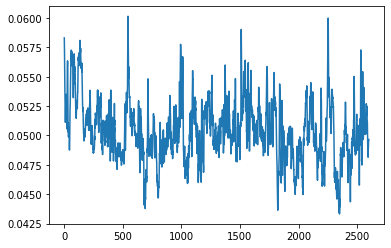

In [123]:
plt.plot(np.std(b.c[:, :-65].T, axis=0))

In [124]:
print(b.activation_param)
print(b.activation_param1)
print(b.activation_param2)

255
100
3.8


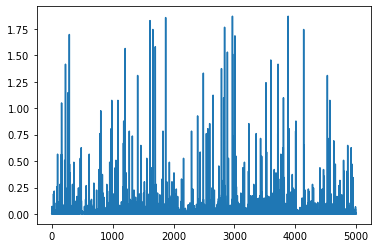

In [125]:
plt.plot(b.yy.T)

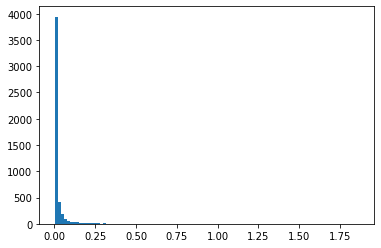

In [126]:
plt.hist((b.yy).T, bins=100);

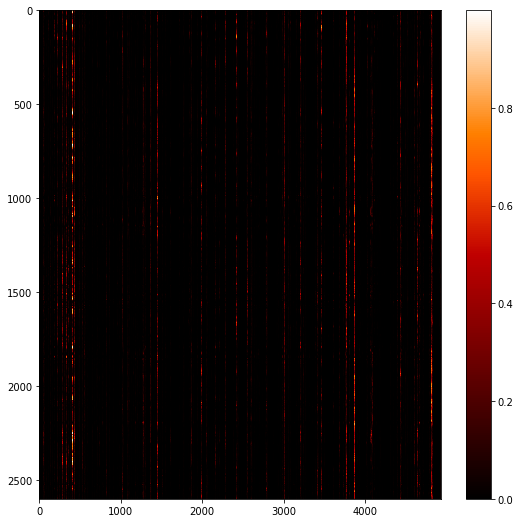

In [127]:
plt.figure(1,figsize=(9,9))
im=plt.imshow(b.c[:,:-65], cmap='gist_heat', interpolation='none', aspect = 1.2*b.c.shape[1]/b.c.shape[0])
plt.colorbar(im)

In [ ]:
ks_data_test = ks_data_origin[:, n_train:, :]

# Algorithm testing
b.parallel_test_runs=50
pred_output, rmse, rmse_vec, rmse_vert = b.predict_and_score(ks_data_test, detailed_score=True)

Reservoir Computing algorithm - Testing phase:

Initialization complete. 		Elapsed time: 0.008960723876953125 s


1.0 0.0 128


1.190704862880251 -0.16001607515842764 128
1.4964970304535585 -0.029557718946760937 128
1.7782948142279094 -0.006598223994854607 128
1.8232204733556814 -0.0001468815165714026 128
1.8240314198182719 0.0015485081518333559 128
1.8313883865977982 0.0017193110628564764 128
1.7585119817401704 0.0014464745208319328 128
1.7951210351825062 0.0013286569687780154 128
1.8222925898729256 0.00129331170316184 128
1.841171762099092 0.0012399224521006211 128
1.8542822566767647 0.0012666913481586216 128
1.8708237387776667 0.001274722016976022 128
1.8771671605903553 0.0012771312176212421 128
1.8746085277521756 0.0012350683064384417 128
1.8954127288563982 0.001265235104459968 128
1.8998913654134515 0.0012742851438664257 128
1.9144515411180314 0.0012770001556883632 128
1.934489129288322 0.0012778146592349444 128
1.9365233935408361 0.0012780590102989186 128
1.9193164628006607 0.001278132315618111 128
1.9319715935945379 0.001285228451881366 128
1.9396587242397199 0.001291640809221431 128
1.9439061749928486 0

1.9798935187555045 0.001261586146731338 128
1.9745834702932437 0.0012304047851714704 128
1.9756103122098028 0.0012210503767035102 128
1.9581528880743375 0.0012610297255394884 128
1.9660944711277328 0.001273023530190282 128
1.9569115439279126 0.0012338360002091537 128
1.9201036337091195 0.0012648654125911815 128
1.8525295030397706 0.0013191072514019057 128
1.900242982405927 0.001267249939626217 128
1.9360346030067541 0.0012748895944163004 128
1.9676564203562201 0.0012771814908533255 128
1.9799818500434792 0.001277869059784433 128
1.983165112555001 0.0012780753304637653 128
1.9846344577031134 0.0013230702267636807 128
1.9834546074386328 0.0013437872161342537 128
1.9840265483450326 0.0013644209472208116 128
1.984892888440123 0.0013574389730575793 128
1.98515279046865 0.0013169419305576623 128
1.985230761077208 0.0013347302067918498 128
1.9779725903016594 0.001340066689662106 128
1.9556664999680118 0.0013441391448796732 128
1.9600942944440645 0.0013553516266402708 128
1.9621359546970558 0.

1.9805895889451635 0.0012320964099295582 128
1.9838618006201623 0.0012643435355073028 128
1.9848434641226618 0.0012740176731806264 128
1.9851379631734116 0.0012769199144826234 128
1.9852263128886367 0.001235004915496856 128
1.9852528178032043 0.0012652160871774922 128
1.9852607692775743 0.0012956797936140433 128
1.9847487883252297 0.001290478348661775 128
1.9750800500734114 0.0013267911322230837 128
1.928612375923802 0.0013105811877459246 128
1.9200107227207948 0.0013149141820627546 128
1.9342142086261438 0.0012945612077129342 128
1.924748394081839 0.0013280159899384315 128
1.9394330759454843 0.0012974105310581616 128
1.9400409145935509 0.0012845274956887409 128
1.936058908892444 0.0012800728612350576 128
1.9029879838655344 0.0012787364708989526 128
1.9056272592028427 0.0012795328226619593 128
1.8981804791281327 0.0012785744593270232 128
1.9296078106913526 0.0012782869503265423 128
1.9542071105207866 0.0012782006976263982 128
1.964636486693185 0.001278174821816355 128
1.968039550713387

1.9521338437959073 0.001351587119380567 128
1.947648710859705 0.0013002214405365077 128
1.926104797694742 0.0013040205427477197 128
1.9265027565310446 0.0012859207753527513 128
1.9394502359548194 0.0012804908451342608 128
1.9438436285073784 0.0012934842654365201 128
1.939329743306553 0.0012918530768778842 128
1.9236091074287964 0.0012822705355918008 128
1.8801726189399164 0.0012793957732059756 128
1.8795982929050314 0.001323466359586344 128
1.891668587139173 0.0013366875355004543 128
1.8905019750718837 0.001297594767754561 128
1.888817741021228 0.0012839930428548037 128
1.8860001137824316 0.0012799125253848765 128
1.9016269219527033 0.0012786883701438984 128
1.916689116040247 0.001278321123571605 128
1.9244894605900824 0.0013231439646960328 128
1.9428166325884213 0.001336590817033361 128
1.948314784187923 0.0013406248727345594 128
1.9465029929773094 0.0013418350894449191 128
1.9421618897030983 0.001297265139361911 128
1.942802233863842 0.0013288271694331245 128
1.9218539577494922 0.001

1.970541996824522 0.0012315151860470388 128
1.9698112037527882 0.001264169168342547 128
1.976448128582308 0.0012311796916548332 128
1.9694200745389376 0.001221282848648519 128
1.9609182846793487 0.0012610994671229912 128
1.9597696820811275 0.0012302587812889664 128
1.9620385709881747 0.0012637922469151254 128
1.9710149332749494 0.0012310666152266067 128
1.9799352318338013 0.0012640345970964175 128
1.9820392732616883 0.0012739249916573607 128
1.9842967059151198 0.0012768921100256435 128
1.984973935711149 0.0013227152606322442 128
1.9851771046499578 0.0013364622058142245 128
1.9852380553316005 0.0012962299095148897 128
1.9852563405360932 0.0013115783180920305 128
1.985261826097441 0.0013331211230521603 128
1.9852634717658453 0.0013395839645401993 128
1.9852639654663666 0.0012965898018904953 128
1.9852641135765232 0.0012846450753452626 128
1.9852641580095702 0.00132504115022813 128
1.9852641713394843 0.0013371599726929903 128
1.9852641753384583 0.0012958626043363326 128
1.9852641765381507

1.9852641770444222 0.0012923198962519014 128
1.9852641770499397 0.0012824105814040058 128
1.9852637613110562 0.0012794377869496372 128
1.9796074332261644 0.0012785459486133266 128
1.9558907876887819 0.00130808090641178 128
1.9487757940275672 0.0013158202345792853 128
1.950256132237368 0.0013185612764312152 128
1.957908557725145 0.0012902829954578 128
1.957566169381752 0.0012486218436596366 128
1.9727746182709969 0.0012693011656263265 128
1.9815173094179122 0.0013154039091980195 128
1.9841401167619868 0.0013097614053284568 128
1.9849269589652092 0.0013325760492230883 128
1.985163011626176 0.0012944874272953618 128
1.9852338274244659 0.0013218010156858698 128
1.985255072163953 0.001336187932330312 128
1.9852614455857989 0.001340504007323645 128
1.9852633576123528 0.0012970729408691337 128
1.9852639312203189 0.0013287695098852914 128
1.9852641033027087 0.0012933454654940229 128
1.9852641549274257 0.0012827182521766424 128
1.9852641704148408 0.0012795300881814282 128
1.9852641750610653 0.0

1.9687551039366684 0.0012851785207152562 128
1.9507801981339132 0.0013252011838391282 128
1.9568828384376498 0.0013372079827762896 128
1.9635186088749506 0.0013418847426107019 128
1.9787405065990984 0.0013474173762674194 128
1.9833070759163425 0.0013015287212124384 128
1.9830563929026015 0.001285173228892167 128
1.9797011556380704 0.0012802665811960856 128
1.9559189044123537 0.001305906671001561 128
1.9306559288921168 0.001248326783577836 128
1.9196120592087715 0.0013536260690806172 128
1.8008754727415273 0.0013705741780308915 128
1.8073370201671468 0.0014013931837749296 128
1.9150328241040788 0.0013647651399924209 128
1.9460040439085464 0.0012613584831497953 128
1.8676346438261562 0.001304435121527138 128
1.9298789842802593 0.0013045992985625257 128
1.968648619220691 0.0012940080617532433 128
1.9802795097028203 0.0012829170310544083 128
1.9827146047621624 0.0012795897218447578 128
1.9810058987247645 0.0012785915290818629 128
1.9770357187385348 0.0012782920712529943 128
1.9755140776000

1.9852641668271538 0.0013246739307307175 128
1.9852641739847594 0.0013370498068437666 128
1.9852641761320409 0.0012958295545815654 128
1.9852641767762254 0.0013283964939990209 128
1.9852641769694808 0.0012932335607281416 128
1.9852641770274575 0.0013276176958429936 128
1.9852641770448503 0.0012929999212813335 128
1.9852641770500683 0.0013275476040089512 128
1.9852641770516337 0.0013379119088272366 128
1.9852641770521031 0.0013552123355600805 128
1.985264177052244 0.0013100937361913436 128
1.9852641770522863 0.0012877427333858385 128
1.985264177052299 0.001281037432544187 128
1.985264177052303 0.0013239588573878073 128
1.9852641770523038 0.0013368352848408935 128
1.9852641770523043 0.0012989153427237538 128
1.9852641770523043 0.001296924076451481 128
1.9852641770523043 0.0012837918354638798 128
1.9852641770523043 0.0013247851782637152 128
1.9852641770523043 0.0013370831811036657 128
1.9852641770523043 0.0013407725819556508 128
1.9852641770523043 0.0013427384754910005 128
1.9847498106576

1.9325679828264986 0.0012778171904291316 128
1.9242545263419455 0.0012352740982808086 128
1.926759083680592 0.001265296842012678 128
1.9342043798585173 0.0012410017883546162 128
1.9488842712454042 0.0012670151490348203 128
1.9643206949494636 0.0012748191572388816 128
1.9754877257809547 0.0012771603597000998 128
1.9823312416708996 0.0012778627204384654 128
1.984384296437883 0.001278073428659975 128
1.9844858464733222 0.001278136641126428 128
1.9850306778786098 0.0012781556048663638 128
1.985194127300196 0.0012781664269796004 128
1.9803424759573487 0.0012488572338774072 128
1.9756334653420742 0.0012693717826916576 128
1.9759253107244519 0.001297379485576172 128
1.9714261979227672 0.0013357853763541656 128
1.973831221355327 0.001340383240530801 128
1.974552728385095 0.0012970572138837357 128
1.97101442322096 0.001283831776693556 128
1.9728350495211577 0.0012798641455365023 128
1.9633447115336702 0.001278673856189386 128
1.9544732078714977 0.0012783167693852513 128
1.9381587259094544 0.001

1.9736969439483514 0.0012797677271480204 128
1.9745124451630023 0.001235859259296475 128
1.968839369513146 0.001265472390317378 128
1.9537440103010453 0.0012743563296236488 128
1.9602308694541501 0.0013145819513408978 128
1.9581615231539125 0.0012890891979307048 128
1.9545316595357665 0.001281441371907647 128
1.9445704896706353 0.0013240800391968453 128
1.9519941041890396 0.001291938624287489 128
1.9570924279340347 0.001327229214910798 128
1.9599594464341452 0.0012928833770016748 128
1.9676432475060859 0.0012844867901422687 128
1.9631246923057604 0.001280060649571116 128
1.9630450740555645 0.0012787328073997702 128
1.9604077188939923 0.0012783344547483665 128
1.964607951632443 0.0012782149489529455 128
1.9475933772996383 0.001278179097214319 128
1.9377996322165325 0.001278168341692731 128
1.9541716077188944 0.0013230981301323706 128
1.9659068958915107 0.0013365770666642625 128
1.951780626488386 0.0013429136999852742 128
1.9641827926519473 0.0012983444022545952 128
1.9282681253859237 0.

1.9852363 0.0012835347 128
0.9830356397600246 0.09942103361268839 128
1.9852558 0.0012868855 128
0.9881643580383346 0.09460857483754288 128
1.9852617 0.001238249 128
0.9910249516679795 0.09353014712801824 128
1.9852623 0.0012812923 128
0.9938146342658174 0.09463754092538727 128
1.9715149 0.0012636699 128
1.0194197682919066 0.11566623650905708 128
1.9649637 0.0012738156 128
1.0307322853248522 0.1318910808962333 128
1.9767481 0.0012398122 128
1.0330281339916811 0.12586896324570512 128
1.9827094 0.001252598 128
1.039033216642518 0.12171975795885585 128
1.9757538 0.0012441626 128
1.0419070703726703 0.11394660306475807 128
1.9779221 0.0012698056 128
1.0217549353641522 0.08304716152602876 128
1.9755305 0.0012430932 128
1.0139429691918094 0.08782114713547962 128
1.9688938 0.0012491548 128
1.0039675554023952 0.09377255240907004 128
1.9735291 0.0012645489 128
0.9974996668403472 0.09606531134142399 128
1.9815171 0.0012794683 128
0.9949222488444747 0.08201421596544456 128
1.9835896 0.0012357695 1

0.9996184984413511 -0.04139105802446895 128
1.9852178 0.0012163173 128
0.9831758909595578 -0.03962431821192888 128
1.9852504 0.0012298883 128
0.9780921411035034 -0.028801006595681085 128
1.9852601 0.0012762889 128
0.9975233730179052 0.013248977592442465 128
1.9820904 0.0012361315 128
1.0057131479415333 0.03346564413749152 128
1.984312 0.0012273825 128
1.0081537826026212 0.01070897476567105 128
1.9814775 0.0012202561 128
0.9963744032222355 0.007498874742522884 128
1.981779 0.0012180058 128
0.989742122568344 -0.01908126040818177 128
1.9805269 0.0011780259 128
0.9871180945741089 -0.03948622934771767 128
1.9803497 0.0012494206 128
0.9980207583783023 -0.051330344803255254 128
1.9837899 0.0012304597 128
1.0126369851406873 -0.0419406381476734 128
1.9848219 0.0012220552 128
1.0049453907185184 -0.04225723138226015 128
1.9823796 0.0012224044 128
0.9992862864232591 -0.03462092320085803 128
1.9842892 0.0012236134 128


In [ ]:
total_pred = (rmse.shape[1])
length_input = pred_output.shape[0] - total_pred
time_input = range(rmse.shape[0])
time_pred = tt[0:total_pred]*lyap_exp
t_min = 0
t_max = (tt[b.forget+total_pred]-tt[b.forget])*lyap_exp
x_min = xx.min()
x_max = xx.max()

plt.figure(1,figsize=(8,2))
plt.ylabel('average rms by prediction length')
plt.xlabel('\Lambda_{max} * Time')
plt.plot(time_pred[:], rmse_vec[:])
# scipy.io.savemat('time_pred_new_2.mat', dict(time_pred_new_2=time_pred))
# scipy.io.savemat('rmse_vec_new_2.mat', dict(rmse_vec_new_2=rmse_vec))
plt.show;
# plt.savefig('phase_LM_kuramoto_rmse.png', dpi=400)

plt.figure(2,figsize=(10,2))
plt.title('rmse for phase encoding')
plt.ylabel('input length')
plt.xlabel('\Lambda_{max} * Time')
im=plt.imshow(rmse[:,:], cmap='gist_heat', interpolation='nearest', 
              aspect = 0.003*total_pred/b.parallel_test_runs, 
              extent = [t_min , t_max, 0, b.parallel_test_runs])
plt.colorbar(im)
plt.show;

############################################################################
n_input = np.argmin(np.sum(rmse[:,:], axis=1)) # np.argmin(rmse_vert)
n_input = 49
#############################################################################
total_pred = b.pred_horizon*b.rec_pred_steps

input_data = data_utils.data_preprocessing(
    ks_data_test, standardize=b.output_standardize,
    scale_min_max=b.scale_output_MinMax)[0, b.forget:b.forget+total_pred, :]
targetted_data = data_utils.data_preprocessing(
    ks_data_test, standardize=b.output_standardize,
    scale_min_max=b.scale_output_MinMax)[0, n_input+b.forget:n_input+b.forget+total_pred, :]

prediction = pred_output[n_input, :].reshape(targetted_data.shape)

vmax = max(np.concatenate((targetted_data, input_data)).flatten())
vmin = 0

# plot training data
fig, axs = plt.subplots(3, 1, sharex=False, figsize=(9,6))
plt.suptitle('Trained, tested, predicted and abs(tested-predicted) plots                       ')
plt.ylabel('x')
plt.xlabel('\Lambda_{max} * Time')

datum = [targetted_data, prediction, targetted_data-prediction+0.5]
for i in range(3):
        im=axs[i].imshow(datum[i].T, cmap=plt.get_cmap('jet'), interpolation='nearest', 
                         aspect = 0.005*total_pred/spatial_points, 
                         extent = [t_min , t_max, x_min , x_max], vmin=vmin, vmax=vmax)
        axs[i].invert_yaxis()
#     im=axs[i].pcolormesh(time_axs, xx_axs, datum[i].T, cmap=plt.get_cmap('jet'), vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.4)
# plt.savefig('phase_SLM_kuramoto_pred.png', dpi=400)

print('best plot is at '+str(np.argmin(rmse_vert)))

In [ ]:
plt.plot(rmse_vert[:])

best plot is at 54


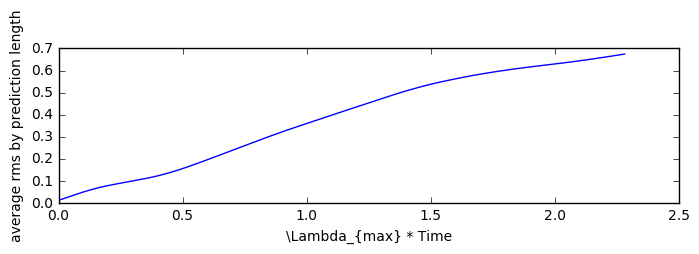

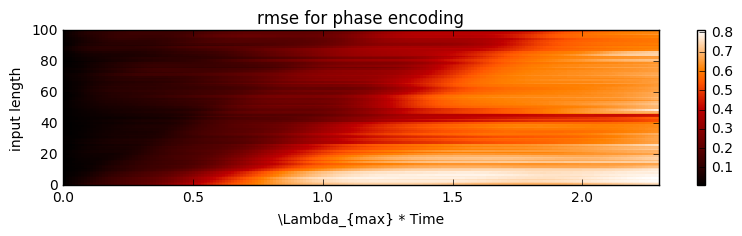

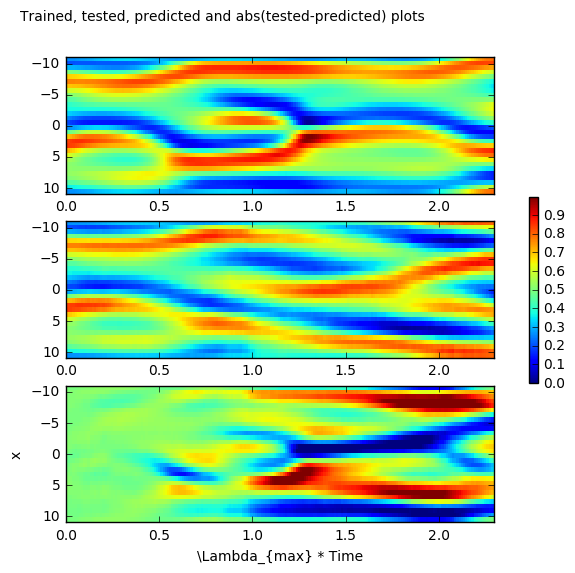

In [ ]:
total_pred = (rmse.shape[1])
length_input = pred_output.shape[0] - total_pred
time_input = range(rmse.shape[0])
time_pred = tt[0:total_pred]*lyap_exp
t_min = 0
t_max = (tt[b.forget+total_pred]-tt[b.forget])*lyap_exp
x_min = xx.min()
x_max = xx.max()

plt.figure(1,figsize=(8,2))
plt.ylabel('average rms by prediction length')
plt.xlabel('\Lambda_{max} * Time')
plt.plot(time_pred[:], rmse_vec[:])
# scipy.io.savemat('time_pred_new_2.mat', dict(time_pred_new_2=time_pred))
# scipy.io.savemat('rmse_vec_new_2.mat', dict(rmse_vec_new_2=rmse_vec))
plt.show;
# plt.savefig('phase_LM_kuramoto_rmse.png', dpi=400)

plt.figure(2,figsize=(10,2))
plt.title('rmse for phase encoding')
plt.ylabel('input length')
plt.xlabel('\Lambda_{max} * Time')
im=plt.imshow(rmse[:,:], cmap='gist_heat', interpolation='nearest', 
              aspect = 0.003*total_pred/b.parallel_test_runs, 
              extent = [t_min , t_max, 0, b.parallel_test_runs])
plt.colorbar(im)
plt.show;

############################################################################
n_input = np.argmin(np.sum(rmse[:,:], axis=1)) # np.argmin(rmse_vert)
# n_input = 198
#############################################################################
total_pred = b.pred_horizon*b.rec_pred_steps

input_data = data_utils.data_preprocessing(
    ks_data_test, standardize=b.output_standardize,
    scale_min_max=b.scale_output_MinMax)[0, b.forget:b.forget+total_pred, :]
targetted_data = data_utils.data_preprocessing(
    ks_data_test, standardize=b.output_standardize,
    scale_min_max=b.scale_output_MinMax)[0, n_input+b.forget:n_input+b.forget+total_pred, :]

prediction = pred_output[n_input, :].reshape(targetted_data.shape)

vmax = max(np.concatenate((targetted_data, input_data)).flatten())
vmin = 0

# plot training data
fig, axs = plt.subplots(3, 1, sharex=False, figsize=(9,6))
plt.suptitle('Trained, tested, predicted and abs(tested-predicted) plots                       ')
plt.ylabel('x')
plt.xlabel('\Lambda_{max} * Time')

datum = [targetted_data, prediction, targetted_data-prediction+0.5]
for i in range(3):
        im=axs[i].imshow(datum[i].T, cmap=plt.get_cmap('jet'), interpolation='nearest', 
                         aspect = 0.005*total_pred/spatial_points, 
                         extent = [t_min , t_max, x_min , x_max], vmin=vmin, vmax=vmax)
        axs[i].invert_yaxis()
#     im=axs[i].pcolormesh(time_axs, xx_axs, datum[i].T, cmap=plt.get_cmap('jet'), vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.4)
# plt.savefig('phase_SLM_kuramoto_pred.png', dpi=400)

print('best plot is at '+str(np.argmin(rmse_vert)))